# Imports

In [1]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.utils import resample
from sklearn.pipeline import Pipeline

### Load wine dataset

In [2]:
#Load wine dataset
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Series(wine.target, name='target')

X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


### Define variables X, Y and df

In [3]:
#Define variables X, Y and df
X=wine.data
Y=wine.target
df=pd.DataFrame(X,columns=wine.feature_names)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


# Train a default decision tree
### no.1

In [4]:
# Split dataset (train/test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Train a default decision tree no.1
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)

# Predict and check accuracy
predictions = model.predict(X_test)
accuracy = accuracy_score(Y_test, predictions)
print("Test accuracy:", accuracy)

Test accuracy: 0.9166666666666666


### no.2

In [5]:
# Train a default decision tree no.2
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
model.fit(X_train, Y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(Y_test, predictions)
print("Test accuracy:", accuracy)

Test accuracy: 0.9166666666666666


### no.3

In [6]:
# Train a default decision tree no.3
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
model.fit(X_train, Y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(Y_test, predictions)
print("Test accuracy:", accuracy)

Test accuracy: 0.8888888888888888


### no.4

In [7]:
# Train a default decision tree no.4
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
model.fit(X_train, Y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(Y_test, predictions)
print("Test accuracy:", accuracy)

Test accuracy: 0.9722222222222222


### no.5

In [8]:
# Train a default decision tree no.5
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
model.fit(X_train, Y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(Y_test, predictions)
print("Test accuracy:", accuracy)

Test accuracy: 0.9444444444444444


# Save the trained model to disk

In [9]:
# Save the trained model to disk
import joblib as jb
jb.dump(model, 'wine-decision-tree.joblib')

# Load the saved model
model = jb.load('wine-decision-tree.joblib')

# Plot the tree using Graphviz and Pydotplus
Make sure you have graphviz installed from https://graphviz.org/download/ otherwise it will not work

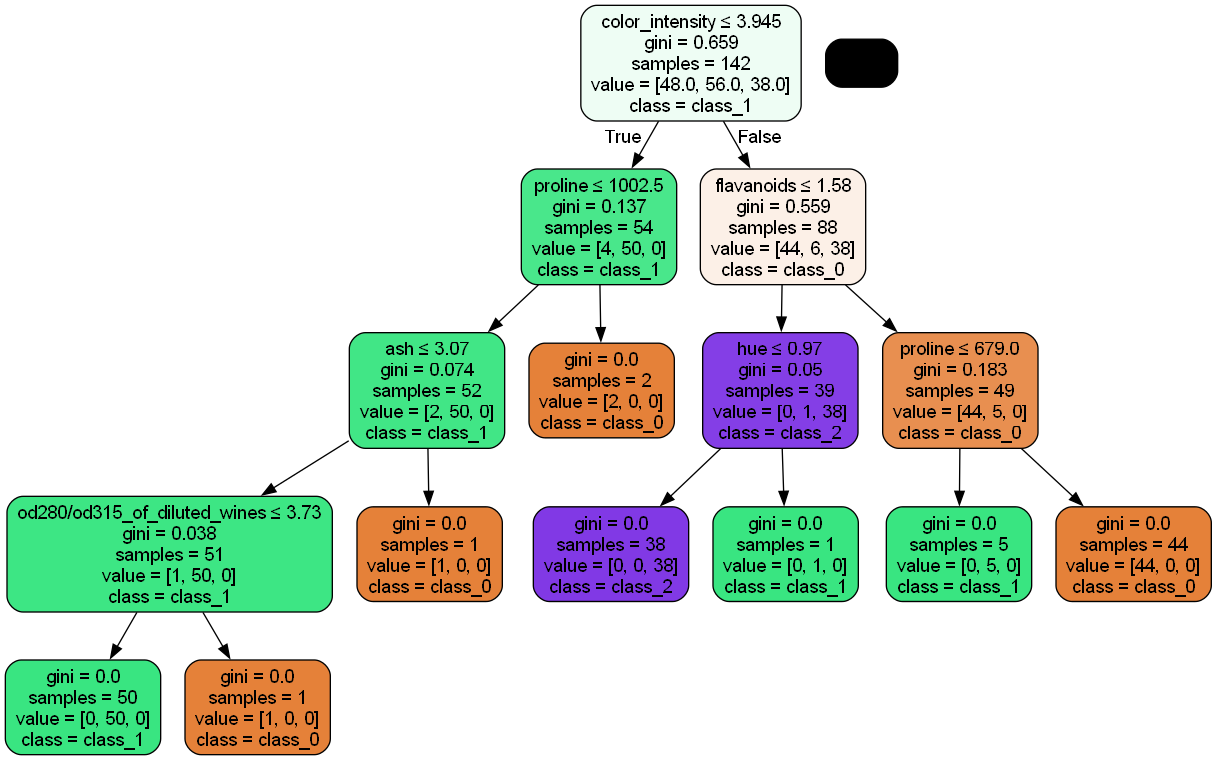

In [10]:
#Plot the tree using Graphviz and Pydotplus
#Make sure you have graphviz installed from https://graphviz.org/download/ otherwise it will not work
!pip install pydotplus
from sklearn import tree
import pydotplus
from IPython.display import Image

dot_data = tree.export_graphviz(
    model,
    out_file=None,
    feature_names=wine.feature_names,
    class_names=wine.target_names,
    label='all',
    filled=True,
    rounded=True,
    special_characters=True
)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

# Limit the depth of the tree

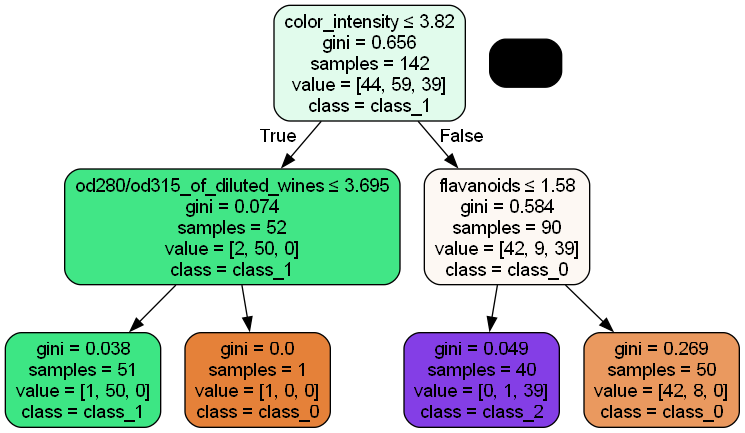

In [14]:
#Limit the depth of the tree
model = DecisionTreeClassifier(max_depth=2)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
model.fit(X_train, Y_train)
predictions = model.predict(X_test)
accuracy_score(Y_test, predictions)
print("Test accuracy:", accuracy)

dot_data = tree.export_graphviz(
    model,
    out_file=None,
    feature_names=wine.feature_names,
    class_names=wine.target_names,
    label='all',
    filled=True,
    rounded=True,
    special_characters=True
)

graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png())

# Entropy

Test accuracy: 0.9444444444444444


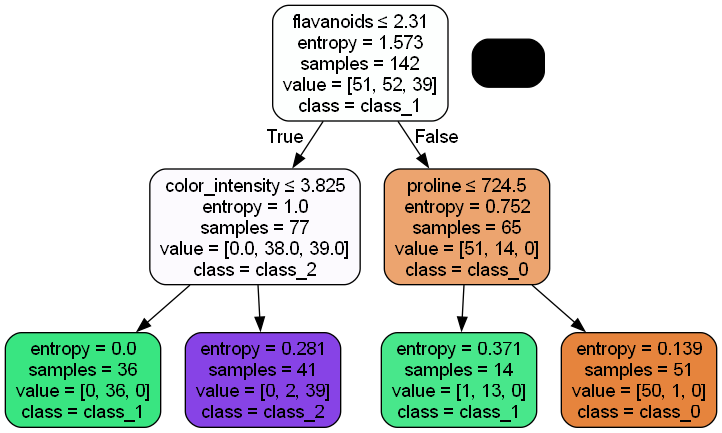

In [16]:
#Entropy
model = DecisionTreeClassifier(max_depth=2, criterion = 'entropy')

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
model.fit(X_train, Y_train)
predictions = model.predict(X_test)
accuracy_score(Y_test, predictions)
print("Test accuracy:", accuracy)

dot_data = tree.export_graphviz(
    model,
    out_file=None,
    feature_names=wine.feature_names,
    class_names=wine.target_names,
    label='all',
    filled=True,
    rounded=True,
    special_characters=True
)

graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png())

# Limit the tree by parameters: SPLIT

Test accuracy: 0.9444444444444444


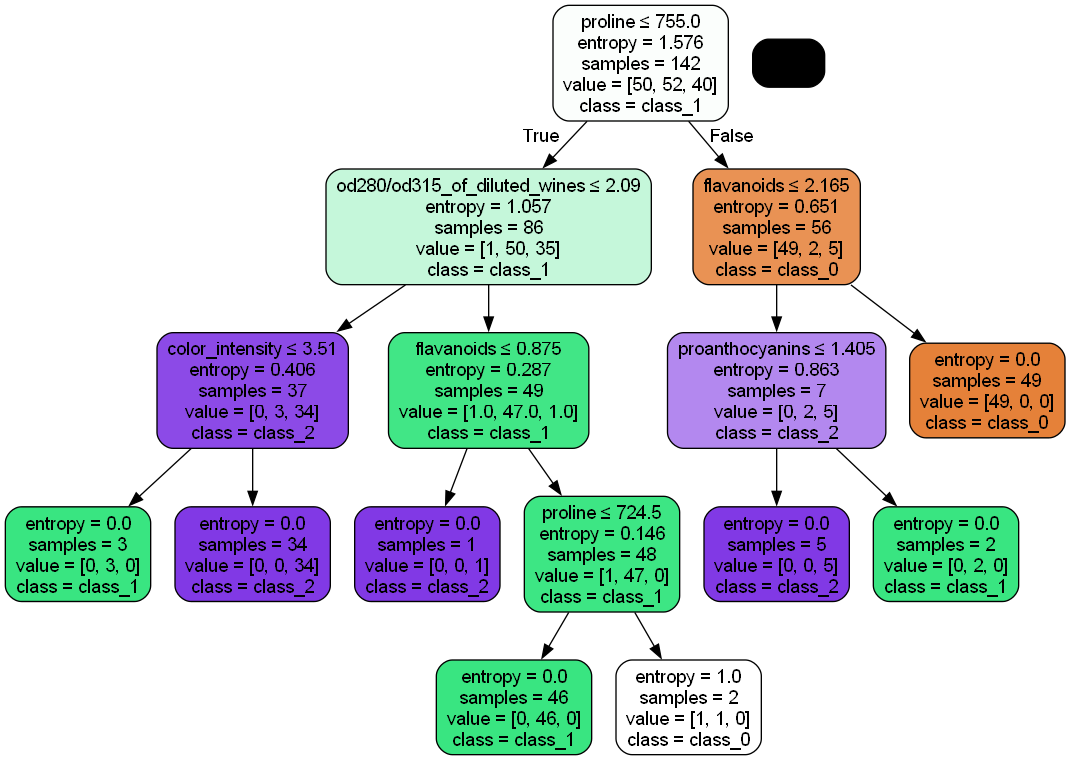

In [17]:
#Limit the tree by parameters: SPLIT
model = DecisionTreeClassifier(criterion = 'entropy', min_samples_split = 4)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
model.fit(X_train, Y_train)
predictions = model.predict(X_test)
accuracy_score(Y_test, predictions)
print("Test accuracy:", accuracy)

dot_data = tree.export_graphviz(
    model,
    out_file=None,
    feature_names=wine.feature_names,
    class_names=wine.target_names,
    label='all',
    filled=True,
    rounded=True,
    special_characters=True
)

graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png())

# Limit the tree by parameters: LEAF

Test accuracy: 0.9444444444444444


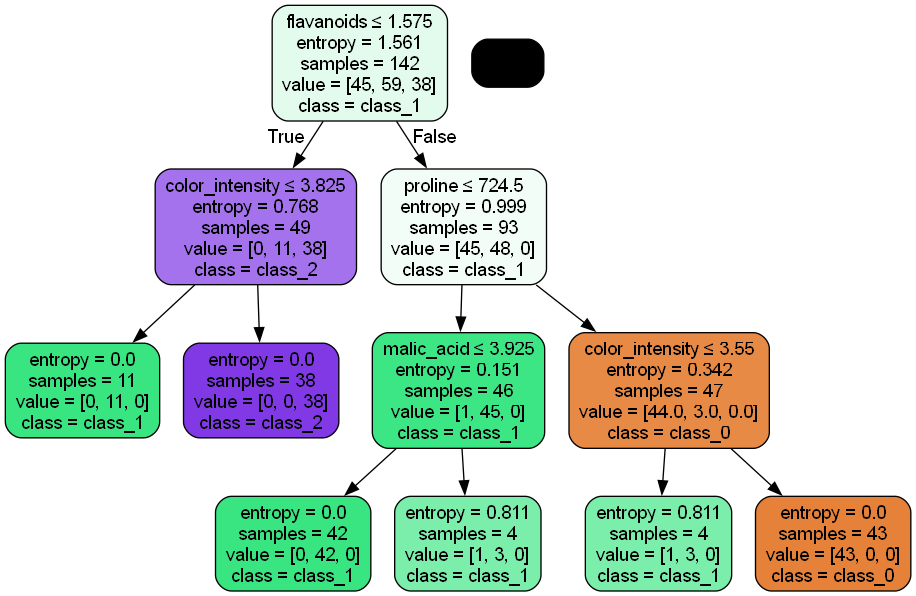

In [20]:
#Limit the tree by parameters: LEAF
model = DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf = 4)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
model.fit(X_train, Y_train)
predictions = model.predict(X_test)
accuracy_score(Y_test, predictions)
print("Test accuracy:", accuracy)

dot_data = tree.export_graphviz(
    model,
    out_file=None,
    feature_names=wine.feature_names,
    class_names=wine.target_names,
    label='all',
    filled=True,
    rounded=True,
    special_characters=True
)

graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png())

# Limit the tree by parameters: COMBINATION OF SPLIT AND LEAF

Test accuracy: 0.9444444444444444


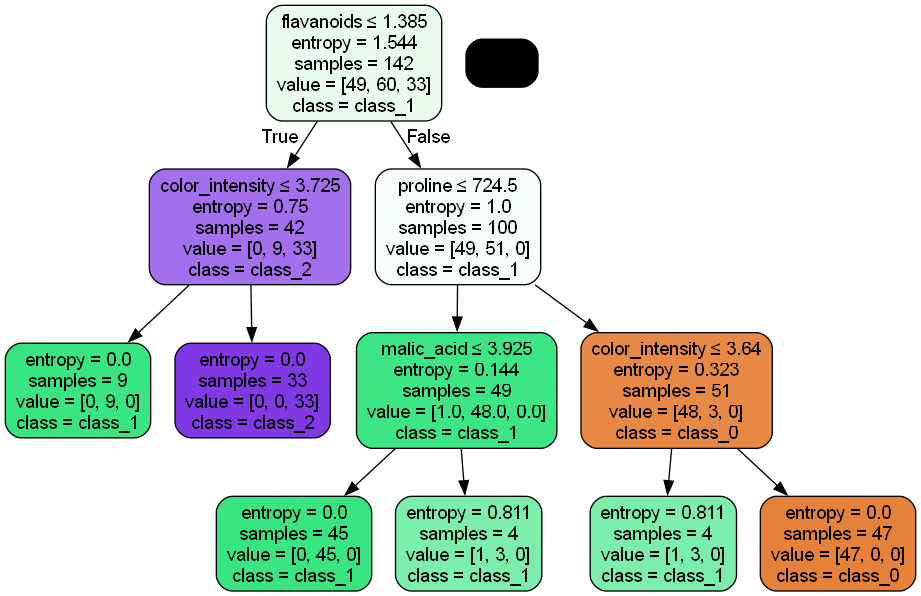

In [19]:
#Limit the tree by parameters: COMBINATION OF SPLIT AND LEAF
model = DecisionTreeClassifier(criterion = 'entropy', min_samples_split = 4, min_samples_leaf = 4 )

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
model.fit(X_train, Y_train)
predictions = model.predict(X_test)
accuracy_score(Y_test, predictions)
print("Test accuracy:", accuracy)

dot_data = tree.export_graphviz(
    model,
    out_file=None,
    feature_names=wine.feature_names,
    class_names=wine.target_names,
    label='all',
    filled=True,
    rounded=True,
    special_characters=True
)

graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png())